# K-Means++

The K-Means clustering algorithm is one of the most popular clustering algorihm for Machine Learning.

However, there can be some problems with its first step. In the traditional K-Means algorithms, the starting positions of the centroids ar initialized completely randomly. This can result in suboptimal clusters. 

__K-Means++__ changes the way centroids are initialized to try to fix this problem.

The Step 1 of the K-Means algorithm is "Place `k` random centroids for the initial clusters".

The K-Means++ algorithm replaces Step 1 of the K-Means algoritm and adds the following:

* 1.1 The first cluster centroid is randomly picked from the data points.
* 1.2 For each remaining data point, the dastance from the point to its nearest cluster centroid is claculated.
* 1.3 The next cluster centroid is picked according to a probabalitity proportional to the distance of each point to its nearest cluster centroid. This makes it likely for the next cluster centroid to be far away from the already initialized centroids.

Repeat 1.2-1.3 until `k` centroids are chosen.

## K-Means++ using Scikit-Learn

Using the `scikit-learn` library and its `cluster` module, you can use the `KMeans()` method to build an original K-Means model that finds 6 clusters like so:

`model = KMeans(n_clusters=6, init='random')`

The `init` parameter is used to specify the initialization and `init='random'` specifies that initial centroids are chosen as random (the original K-Means).

There are two ways to implement K-Means++.

__Option 1__: You can adjust the parameter to `init='k-means++'`

`test = KMeans(n_clusters=6, init='k-means++')`

__Option 2__: Simply drop the parameter

`test = KMeans(n_clusters=6)`

This is because that `init=k-means++` is actually _default_ in scikit-learn.


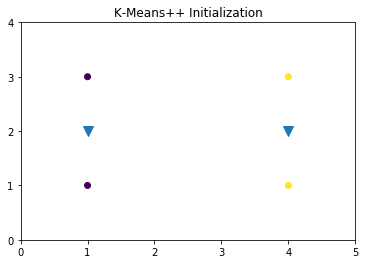

The model's inertia is 4.0


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy
from sklearn.cluster import KMeans 

x = [1, 1, 4, 4]
y = [1, 3, 1, 3]

values = np.array(list(zip(x, y)))

centroids_x = [2.5, 2.5]
centroids_y = [1, 3]

centroids = np.array(list(zip(centroids_x, centroids_y)))

model = KMeans(init='k-means++', n_clusters=2)
# Initial centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)

results = model.fit_predict(values)

plt.scatter(x, y, c=results, alpha=1)

# Cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='v', s=100)

ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_yticks([0, 1, 2, 3, 4])

plt.title('K-Means++ Initialization')
plt.show()
print("The model's inertia is " + str(model.inertia_))

## Review

K-Means++ improves K-Means by placing initial centroids more strategically. As a result, it can result in more optimal clusterings than K-Means. 

It can also outperform K-Means in speed. If you get very unlucky initial centroids using K-Means, the algorithm can take a long time to converge. K-Means++ will often converge quicker. 

You can implement K-Means++ with the `scikit-learn` library similar to how you implement K-Means. 

The `KMeans()` function has an `init` parameter, which specifies the method for initialization:
* `random`
* `'k-means++'`

Note: sickit-learn's `KMeans()` uses `'k-means++'` by default, but it is a good idea to be explicit!

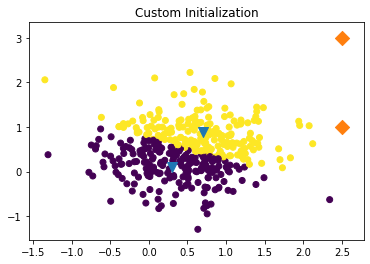

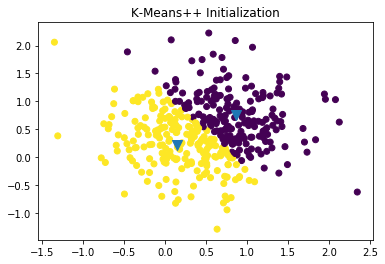

The custom model's inertia is 167.68755719862705
The K-means++ model's inertia is 164.60472447926526


In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy
from sklearn.cluster import KMeans

std = 0.5

x = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.75,std,100)), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100))

y = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100)), np.random.normal(0.75,std,100))

values = np.array(list(zip(x, y)))

centroids_x = [2.5, 2.5]
centroids_y = [1, 3]

centroids = np.array(list(zip(centroids_x, centroids_y)))

model_custom = KMeans(init=centroids, n_clusters=2)
results_custom = model_custom.fit_predict(values)

model = KMeans(init='k-means++', n_clusters=2)
results = model.fit_predict(values)

plt.scatter(x, y, c=results_custom, alpha=1)
plt.scatter(model_custom.cluster_centers_[:, 0], model_custom.cluster_centers_[:, 1], marker='v', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)
plt.title('Custom Initialization')
plt.show()
plt.cla()

plt.scatter(x, y, c=results, alpha=1)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='v', s=100)
plt.title('K-Means++ Initialization')
plt.show()

print("The custom model's inertia is " + str(model_custom.inertia_))
print("The K-means++ model's inertia is " + str(model.inertia_))
